In [1]:
#Imports
from nn import nn
import numpy as np
import sklearn
from typing import List, Dict, Tuple, Union
from numpy.typing import ArrayLike
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt

In [2]:
#Get digits dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets

In [3]:
# Sample 80/20 train/test split
train_idx=np.random.randint(0,len(X)-1,int(len(X)*0.8))
train_X=np.array(X.iloc[list(train_idx),:])
train_y=np.array(y.iloc[list(train_idx)])
test_idx=set(range(len(X)))-set(train_idx)
test_X=np.array(X.iloc[list(test_idx),:])
test_y=np.array(y.iloc[list(test_idx)])

In [4]:
#Initialize NN
NNet=nn.NeuralNetwork(
    nn_arch=[{'input_dim':64,'output_dim':16,'activation':"relu"},{'input_dim':16,'output_dim':64,'activation':"relu"},{'input_dim':64,'output_dim':1,"activation":"relu"}],
    lr=0.01,
    seed=37,
    batch_size=100,
    epochs=100,
    loss_function="BCE"
)

In [5]:
# Train NN
(train_error,val_error)=NNet.fit(train_X,train_y,test_X,test_y)

C:\Users\maple\Python\final-nn\nn\nn.py:419: RuntimeWarning: divide by zero encountered in true_divide
  dA=(-1/n)*sum([yi/yhi - (1-yi)/(1-yhi) for yi,yhi in zip(y,y_hat)])
C:\Users\maple\Python\final-nn\nn\nn.py:419: RuntimeWarning: invalid value encountered in true_divide
  dA=(-1/n)*sum([yi/yhi - (1-yi)/(1-yhi) for yi,yhi in zip(y,y_hat)])


Last layer dA_curr has shape (100,)



AxisError: axis 1 is out of bounds for array of dimension 1

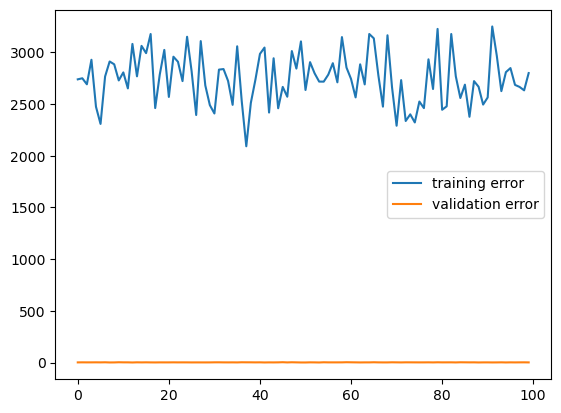

In [6]:
plt.plot(range(100),list(train_error))
plt.plot(range(100),list(val_error))
plt.legend(["training error","validation error"])

In [9]:
train_error

[2487.112965505945,
 2663.244083599829,
 2946.758527863821,
 2919.029921367921,
 2643.4155064155448,
 3246.807065035068,
 2740.866754540801,
 2085.9062624184107,
 2895.514774535578,
 3056.589369572236,
 2396.182300084842,
 2780.620286907323,
 3160.595267582701,
 2370.9754096401684,
 2807.369129521958,
 2670.436517442531,
 2665.820951971673,
 2767.413424590973,
 3374.532585329837,
 2520.748377614313,
 2970.8455828486044,
 2640.6085880297674,
 2217.1901822617488,
 2795.98146336778,
 2745.1859348665653,
 2320.359085409212,
 3119.6590392250987,
 2284.3124742990353,
 2415.314469432021,
 2487.667132256989,
 2953.326958676435,
 2865.7420355274576,
 2940.911582743025,
 2795.815552955835,
 2514.1219241754898,
 2933.9852553679602,
 2659.4591013904837,
 3085.6671326640567,
 2677.4045676360006,
 2617.791048888527,
 2747.096055227562,
 2769.456381046809,
 3378.970748736281,
 2916.795075997832,
 2618.6899600420707,
 2595.7216352270716,
 2786.4083083513665,
 2696.6587464493464,
 2982.7317767846566,
 